In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
frete = pd.read_excel('../BaseDados/f_bases_frete.xlsx', sheet_name="f_custos_frete",skiprows=2)

In [4]:
frete.head()

,Date de Cobrança,Data Emissão Nota Fiscal,Nota Fiscal,Conhecimento,Divisão,Modalidade,Tabela Aplicada,Tipo de Serviço,Tipo de Veiculo,Veiculo,...,Sefaz,Coleta,Despacho,Emex,Endereço Adicional,Entrega,Frete Canhoto,Frete Liquido,ICMS,Frete Bruto
0,2022-09-01,2022-06-06,368366,387394,EPD,RODOVIARIO,Convencional,DEVOLUCAO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.428964
1,2022-09-01,2022-09-08,387739,168859,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.43,348.970000
2,2022-09-01,2022-09-12,388393,173870,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.43,348.970000
3,2022-09-01,2022-09-14,389290,177523,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.93,456.180000
4,2022-09-01,2022-09-16,390067,181634,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,132.320000


# Análise do fracionamento em relação ao custo (frete bruto)

In [42]:
freteaux = frete[['Tipo de Veiculo','Frete Bruto']]

In [6]:
freteaux

,Tipo de Veiculo,Frete Bruto
0,NaN,114.428964
1,NaN,348.970000
2,NaN,348.970000
3,NaN,456.180000
4,NaN,132.320000
...,...,...
56304,NaN,175.389742
56305,NaN,2087.817634
56306,NaN,31.939148
56307,NaN,1916.042465


In [8]:
freteaux['Tipo de Veiculo'].value_counts()

Tipo de Veiculo
Fracionado                21374
AGENDAMENTO                4440
ABBOTT  ( AGENDAMENTO)     1264
DEVOLUÇÃO                   281
TOCO                        167
Devolução                   114
AJUDANTE                    103
Reentrega                    82
Fiorino                      69
Truck                        49
DEVOLUCAO                    45
 3/4                         35
Aereo                        34
COMPLEMENTAR                 32
VUC                          27
3/4.                         26
CARRETA                      23
ABBOTT ( DEDICADO)           18
SPOT                          7
Name: count, dtype: int64

In [44]:
freteaux['Tipo de Veiculo'] = np.where(freteaux['Tipo de Veiculo']=='Fracionado',1,0)

C:\Users\berna\AppData\Local\Temp\ipykernel_10296\2654697179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freteaux['Tipo de Veiculo'] = np.where(freteaux['Tipo de Veiculo']=='Fracionado',1,0)


In [45]:
freteaux['Tipo de Veiculo'].value_counts()

Tipo de Veiculo
0    34935
1    21374
Name: count, dtype: int64

In [59]:
discret_label = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
freteaux['frete_discret'] = pd.qcut(freteaux['Frete Bruto'], q=8, labels=discret_label)

C:\Users\berna\AppData\Local\Temp\ipykernel_10296\3903014036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freteaux['frete_discret'] = pd.qcut(freteaux['Frete Bruto'], q=8, labels= discret_label)


In [57]:
fracionados = []
nao_fracionados = []
for Q in discret_label:
    fracionados.append(len(freteaux[(freteaux['frete_discret']==Q) & (freteaux['Tipo de Veiculo']==1)]))
for Q in discret_label:
    nao_fracionados.append(len(freteaux[(freteaux['frete_discret']==Q) & (freteaux['Tipo de Veiculo']==0)]))
print(fracionados)
print(nao_fracionados)

[2527, 3035, 2872, 2477, 2959, 2327, 2531, 2646]
[4508, 3999, 4162, 4558, 4075, 4707, 4503, 4389]


Analisando o intervalo de cada grupo

In [48]:
print(freteaux.groupby('frete_discret')['Frete Bruto'].max())
print(freteaux.groupby('frete_discret')['Frete Bruto'].min())

frete_discret
Q1       22.296742
Q2       40.987875
Q3       64.415948
Q4      103.622297
Q5      153.064409
Q6      239.140000
Q7      511.512622
Q8    29908.970000
Name: Frete Bruto, dtype: float64
frete_discret
Q1      0.000000
Q2     22.297063
Q3     40.995089
Q4     64.422855
Q5    103.623087
Q6    153.066601
Q7    239.141404
Q8    511.590000
Name: Frete Bruto, dtype: float64


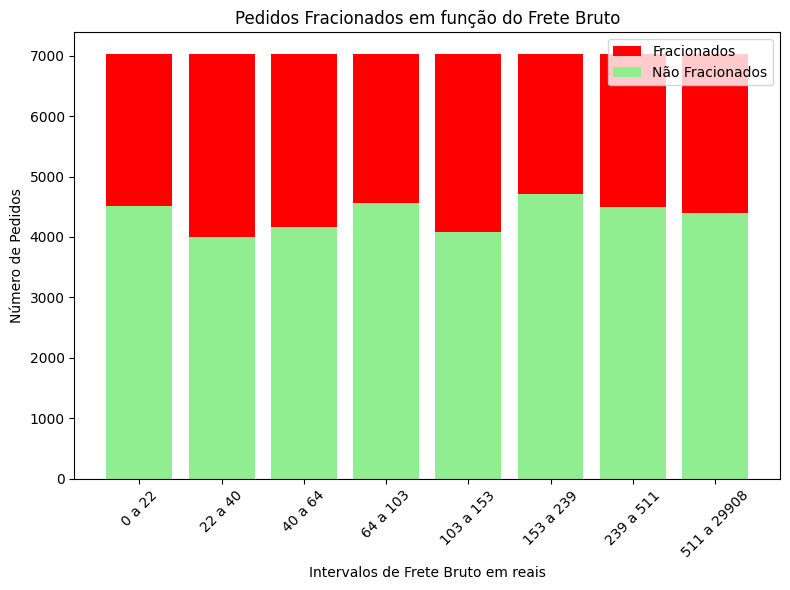

In [155]:
# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(8, 6))

# Barras para Valor_1
plt.bar(discret_label, fracionados, bottom=nao_fracionados,label='Fracionados',color='red')

# Barras para Valor_2 empilhadas em cima de Valor_1
plt.bar(discret_label, nao_fracionados, label='Não Fracionados',color='lightgreen')

plt.xlabel('Intervalos de Frete Bruto em reais')
plt.ylabel('Número de Pedidos')
plt.title('Pedidos Fracionados em função do Frete Bruto')
plt.legend()
plt.xticks(range(len(discret_label)),['0 a 22','22 a 40','40 a 64','64 a 103','103 a 153','153 a 239','239 a 511','511 a 29908'],rotation=45)  # Define os rótulos do eixo x

plt.tight_layout()
plt.show()

### O frete bruto não aparenta ter correlação com o fracionamento.

# Análise do Fracionamento em relação à frequência de pedido do destinatário:

In [82]:
frete['CNPJ do Destinatario']

0        56998701003301
1        12500762000136
2        12500762000136
3        12500762000136
4        12500762000136
              ...      
56304    46054219000760
56305    46054219000760
56306    46054219000760
56307    46054219000760
56308    56998701003301
Name: CNPJ do Destinatario, Length: 56309, dtype: int64

In [95]:
frete[frete['CNPJ do Destinatario']==332586197]

,Date de Cobrança,Data Emissão Nota Fiscal,Nota Fiscal,Conhecimento,Divisão,Modalidade,Tabela Aplicada,Tipo de Serviço,Tipo de Veiculo,Veiculo,...,Sefaz,Coleta,Despacho,Emex,Endereço Adicional,Entrega,Frete Canhoto,Frete Liquido,ICMS,Frete Bruto
1405,2022-09-01,NaT,387189,001000392128,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570000,36.720000
5512,2022-10-01,NaT,393501,001000406672,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.440000,34.800000
5513,2022-10-01,NaT,393924,001000407954,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570000,36.720000
9756,2022-11-01,NaT,398968,4205,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.940000,56.320000
13504,2022-12-01,NaT,403093,11867,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.920000,70.270000
16009,2023-01-01,NaT,406639,23922,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.360000,62.260000
24497,2023-03-01,NaT,418911,47135,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.640000,80.520000
33785,2023-05-01,NaT,428316,63777,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.520000,50.350000
33786,2023-05-01,NaT,429567,65349,AN,RODOVIARIO,Convencional,ENTREGA,Fracionado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.520000,50.350000
33787,2023-05-01,NaT,429567,66867,AN,RODOVIARIO,Convencional,REENTREGA,Reentrega,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.870000,26.690000


In [91]:
freteaux2 = frete[['CNPJ do Destinatario','Tipo de Veiculo']]

In [92]:
freteaux2['Tipo de Veiculo'] = np.where(freteaux2['Tipo de Veiculo']=='Fracionado',1,0)
freteaux2

C:\Users\berna\AppData\Local\Temp\ipykernel_10296\3492123847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freteaux2['Tipo de Veiculo'] = np.where(freteaux2['Tipo de Veiculo']=='Fracionado',1,0)


,CNPJ do Destinatario,Tipo de Veiculo
0,56998701003301,0
1,12500762000136,0
2,12500762000136,0
3,12500762000136,0
4,12500762000136,0
...,...,...
56304,46054219000760,0
56305,46054219000760,0
56306,46054219000760,0
56307,46054219000760,0


In [93]:
freteaux2['Tipo de Veiculo'].value_counts()

Tipo de Veiculo
0    34935
1    21374
Name: count, dtype: int64

In [101]:
CNPJ_total = freteaux2.groupby('CNPJ do Destinatario')['Tipo de Veiculo'].count()
CNPJ_fracionado = freteaux2.groupby('CNPJ do Destinatario')['Tipo de Veiculo'].sum()
print(CNPJ_total)
print(CNPJ_fracionado)

CNPJ do Destinatario
52381617            1
118513761           3
212269704           2
264615794           3
332586197          15
                 ... 
88212113111947     40
92665611026133    123
92665611032290    408
92665611051162    314
96291141008598     61
Name: Tipo de Veiculo, Length: 931, dtype: int64
CNPJ do Destinatario
52381617            1
118513761           3
212269704           2
264615794           3
332586197          14
                 ... 
88212113111947      0
92665611026133    105
92665611032290      0
92665611051162      0
96291141008598     61
Name: Tipo de Veiculo, Length: 931, dtype: int32


In [139]:
df_cnpj = pd.DataFrame({
    'Pedidos Fracionados': CNPJ_fracionado,
    'Pedidos Totais': CNPJ_total
}) 
df_cnpj.reset_index(inplace=True)
df_cnpj

,CNPJ do Destinatario,Pedidos Fracionados,Pedidos Totais
0,52381617,1,1
1,118513761,3,3
2,212269704,2,2
3,264615794,3,3
4,332586197,14,15
...,...,...,...
926,88212113111947,0,40
927,92665611026133,105,123
928,92665611032290,0,408
929,92665611051162,0,314


In [132]:
df_cnpj.duplicated().sum()

0

In [150]:
discret_label2 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
bins = [0,1,5,10,100,100000]
df_cnpj['Pedidos Totais Discretizados'] = pd.cut(df_cnpj['Pedidos Totais'], bins=bins, labels=discret_label2)
df_cnpj

,CNPJ do Destinatario,Pedidos Fracionados,Pedidos Totais,Pedidos Totais Discretizados
0,52381617,1,1,Q1
1,118513761,3,3,Q2
2,212269704,2,2,Q2
3,264615794,3,3,Q2
4,332586197,14,15,Q4
...,...,...,...,...
926,88212113111947,0,40,Q4
927,92665611026133,105,123,Q5
928,92665611032290,0,408,Q5
929,92665611051162,0,314,Q5


In [151]:
df_cnpj['Pedidos Totais Discretizados'].value_counts()

Pedidos Totais Discretizados
Q2    337
Q1    246
Q5    127
Q4    115
Q3    106
Name: count, dtype: int64

In [165]:
fracionados = []
nao_fracionados = []
for Q in discret_label2:
    fracionados.append(df_cnpj[df_cnpj['Pedidos Totais Discretizados'] == Q]['Pedidos Fracionados'].sum())
for Q in discret_label2:
    nao_fracionados.append(df_cnpj[df_cnpj['Pedidos Totais Discretizados'] == Q]['Pedidos Totais'].sum() - df_cnpj[df_cnpj['Pedidos Totais Discretizados'] == Q]['Pedidos Fracionados'].sum())
print(fracionados)
print(nao_fracionados)

[180, 788, 592, 2197, 17617]
[66, 250, 210, 1897, 32512]


In [168]:
porcentagem_fracionados = [100 * f / (n + f) for f, n in zip(fracionados, nao_fracionados)]
porcentagem_nao_fracionados = [100 * n / (n + f) for f, n in zip(fracionados, nao_fracionados)]
print(porcentagem_fracionados)
print(porcentagem_nao_fracionados)

[73.17073170731707, 75.91522157996147, 73.81546134663341, 53.66389838788471, 35.1433302080632]
[26.829268292682926, 24.084778420038536, 26.184538653366584, 46.33610161211529, 64.85666979193681]


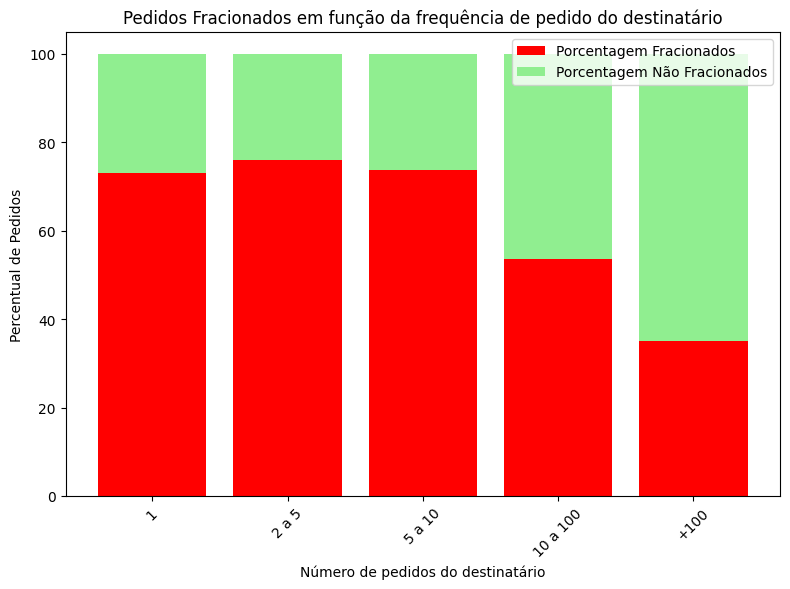

In [170]:
# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(8, 6))

# Barras para Valor_1
plt.bar(discret_label2, porcentagem_fracionados, label='Porcentagem Fracionados',color='red')

# Barras para Valor_2 empilhadas em cima de Valor_1
plt.bar(discret_label2, porcentagem_nao_fracionados, bottom=porcentagem_fracionados, label='Porcentagem Não Fracionados',color='lightgreen')

plt.xlabel('Número de pedidos do destinatário')
plt.ylabel('Percentual de Pedidos')
plt.title('Pedidos Fracionados em função da frequência de pedido do destinatário')
plt.legend()
plt.xticks(range(len(discret_label2)),['1','2 a 5','5 a 10','10 a 100','+100'],rotation=45)  # Define os rótulos do eixo x

plt.tight_layout()
plt.show()

### Uma demanda mais previsível evita fracionamento.